###### status[0] is the 1st person, X[1] is the 2nd person,
###### X[i,0],X[i,1],X[i,2] is the storage of food, cloth, and money of the i-th person

In [1]:
import numpy as np
names = ["A's ", "B's "];
goods = ["food", "cloth", "gold"];
status = np.zeros((2, 3)) * 10;
print(status)

[[0. 0. 0.]
 [0. 0. 0.]]


In [2]:
def normalize_1(matrix):
    matrix = np.array(matrix, dtype=float)  # Ensure it's a NumPy array with float type
    return matrix[:,1:]/matrix[:, 0][:, np.newaxis]  # Divide each row by its first element

def row_sums(matrix):
    matrix = np.array(matrix, dtype=float)
    return np.sum(matrix, axis=1)  # Sum each row
time_per_product = np.array([[0.3,0.5,1000],[0.5,0.2,1000]])

def zero_if_positive(matrix):
    matrix = np.array(matrix, dtype=float)
    matrix[matrix > 0] = 0  # Set elements greater than 1 to zero
    return matrix

In [3]:
# normalize the consumption of goods per day to one
consumption = np.append(np.ones(2), [0])
# The time to produce daily comsumption, sum of a person needs to be smaller than 1 for sustainability
time_per_product = np.array([[0.3,0.5,1000],[0.5,0.2,1000]])
# Intolerance to product scarcity
intolerance = np.array([[0.2,0.05,0],[0.2,0.05,0]]); 
Status = [status];
worktimes = [];
loadings = [];
# controller to show the detail of steps
ifp = 1;
for i in range(40):
    # Can't tolerant the scarcity(storage status of products), work for some time
    worktimes.append(-Status[-1] * intolerance);
    loadings.append(row_sums(worktimes[-1]));
    production = worktimes[-1] / time_per_product;
    if ifp == 0:
        print("worktime: ",i,"-th\n",worktimes)
    newstatus = Status[-1] + production - consumption;
    Status.append(np.round(newstatus, 2));
final=np.array(Status);

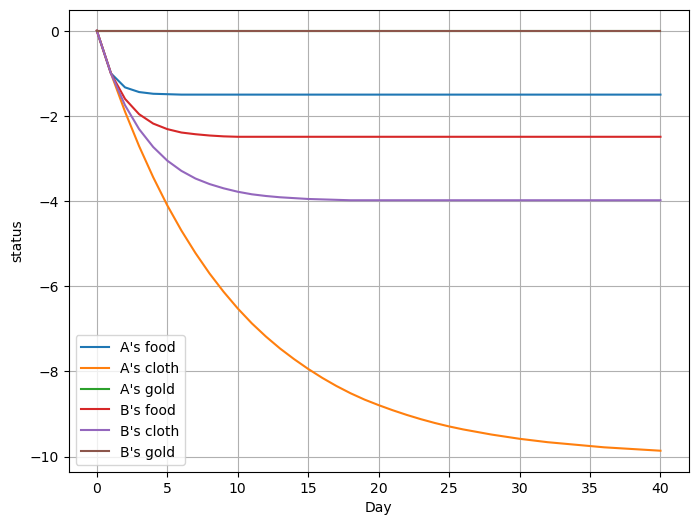

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
x=range(0,len(final))
# plt.gca().set_aspect('equal')
for i in range(len(final[0])):
    for j in range(len(final[0,1])):
        plt.plot(x, final[x,i,j],label = names[i]+goods[j])
plt.xlabel('Day')
plt.ylabel('status')
plt.legend(loc='best')
plt.grid()
plt.show()

In [5]:
# normalize the consumption of goods per day to one
consumption = np.append(np.ones(2), [0]);
# The time to produce daily comsumption, sum of a person needs to be smaller than 1 for sustainability
time_per_product = np.array([[0.3,0.5,1000],[0.5,0.2,1000]]);
aff_price=normalize_1(time_per_product);
# Intolerance to product scarcity
intolerance = np.array([[0.2,0.05,0],[0.2,0.05,0]]); 
Status = [status];
worktimes = [];
trade_prices = [];
exchanges = [];
loadings = []
# controller to show the detail of steps, k in [0,1] to scale the willing to trade
ifp = 1; k = 1;
for i in range(40):
    # Can't tolerant the scarcity(storage status of products), work for some time
    worktimes.append(-Status[-1] * intolerance);
    loadings.append(row_sums(worktimes[-1]));
    production = worktimes[-1] / time_per_product;
    if ifp == 0:
        print("worktime: ",i,"-th\n",worktimes)
    # The actual price after comprimise is weighted by loading
    ## since the more time a person work, the more price he is willing to pay to relief himself
    ### therefore normalize by everyones' loading time
    trade_prices.append(np.dot(loadings[-1], aff_price)/(sum(loadings[-1]+0.0001)));
    # Difference between storage of cloth
    change = np.zeros(len(Status[0][0]));
    if trade_prices[-1][0]<1:
        change[0] = trade_prices[-1][0] * k;
        change[1] = -k;
    else:
        change[0] = k;
        change[1] = -1/trade_prices[-1][0] * k;
    exchanges.append([-change,change]);
    newstatus = Status[-1] + production - consumption + exchanges[-1];
    Status.append(np.round(newstatus, 2));
final=np.array(Status);

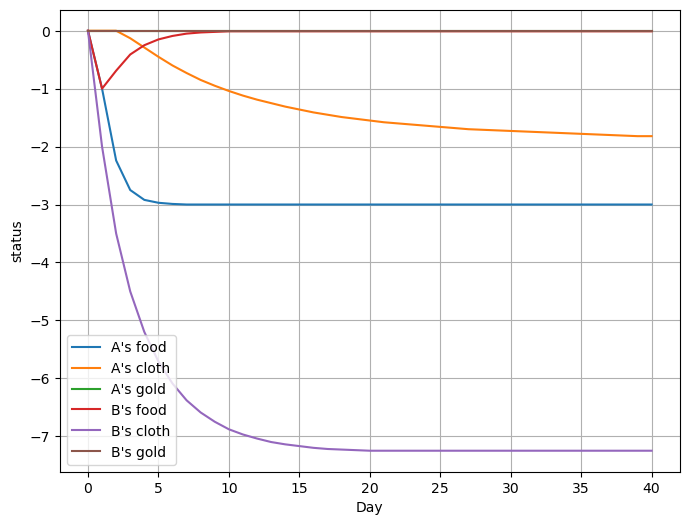

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
x=range(0,len(final))
# plt.gca().set_aspect('equal')
for i in range(len(final[0])):
    for j in range(len(final[0,1])):
        plt.plot(x, final[x,i,j],label = names[i]+goods[j])
plt.xlabel('Day')
plt.ylabel('status')
plt.legend(loc='best')
plt.grid()
plt.show()

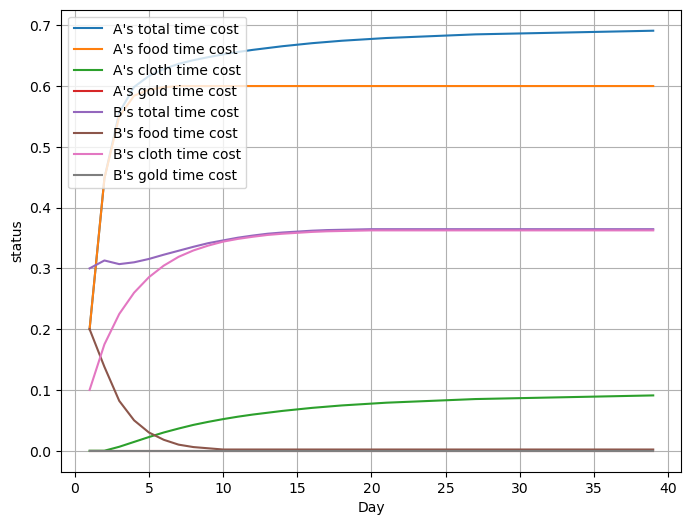

In [7]:
plt.figure(figsize=(8, 6))
x=range(1,len(worktimes))
# plt.gca().set_aspect('equal')
for i in range(len(worktimes[0])):
    plt.plot(x, np.array(loadings)[x,i],label = names[i]+"total time cost")
    for j in range(len(worktimes[0][1])):
        plt.plot(x, np.array(worktimes)[x,i,j],label = names[i]+goods[j]+" time cost")
plt.xlabel('Day')
plt.ylabel('status')
plt.legend(loc='best')
plt.grid()
plt.show()